# Applied Machine Learning 2
## Course project          
                                                 Author: Diego Rodriguez
## Visual search with k-NN

The idea here is to implement a little search engine based on the high-level image representation and k-nearest neighbors
- Fit and tune a k-NN classifier
- Pick an image from the test set and plot its 10 nearest neighbors from the train set

Hint: take a look at the kneighbors() method from Scikit-learn k-NN estimators.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Load the npz file
base_dir = '/Users/rodriguezmod/Downloads/swissroads/'

with np.load(base_dir+'features.npz', allow_pickle=False) as npz_file: 
    # It's a dictionary-like object 
    print(list(npz_file.keys()))
    
    # Load the arrays    
    # Merging test and validation features data to use a cross-validation approach to model fitting.
    X_tr = np.concatenate((npz_file['train_features'], npz_file['validation_features']))
    X_tr_pixels = np.concatenate((npz_file['train_pixels'], npz_file['validation_pixels']))
    y_tr = np.concatenate((npz_file['train_labels'], npz_file['validation_labels']))
    # Reduce to 1-dim
    y_tr = np.argmax(y_tr, axis=1)

    X_te = npz_file['test_features']
    X_te_pixels = npz_file['test_pixels']
    y_te = npz_file['test_labels']
    # Reduce to 1-dim
    y_te = np.argmax(y_te, axis=1)

['train_features', 'validation_features', 'test_features', 'train_labels', 'validation_labels', 'test_labels', 'train_pixels', 'validation_pixels', 'test_pixels']


## k-NN performance
Fit and tune a k-NN classifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create k-NN classifier object. Code from course Applied Machine Learning 2 (EPFL Extension School)
knn = KNeighborsClassifier(
        n_neighbors = 10,
        weights = "uniform"
        #algorithm = 'brute'
)

# Create the pipeline
knn_pipeline = Pipeline([
     ('scaler', StandardScaler()), 
     ('knn', knn)
])

# Fitting on train set
knn_pipeline.fit(X_tr, y_tr)

# Evaluate on train set
accuracy_tr = knn_pipeline.score(X_tr, y_tr)

# Evaluate on test set
accuracy_te = knn_pipeline.score(X_te, y_te)

# Print accuracy
print('Train accuracy: {:.1f}%'.format(100*accuracy_tr))
      
# Print accuracy
print('Test accuracy: {:.1f}%'.format(100*accuracy_te))

Train accuracy: 89.0%
Test accuracy: 94.0%


In [3]:
from sklearn.model_selection import GridSearchCV

# Grid search with cross-validation
grid = {
    'knn__n_neighbors': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}
knn_gscv = GridSearchCV(knn_pipeline, grid, cv=10, refit=True, return_train_score=True)

# Fitting on train set
knn_gscv.fit(X_tr, y_tr)

# Collect results in a DataFrame and evaluate
knn_results = pd.DataFrame({
    'k': knn_gscv.cv_results_['param_knn__n_neighbors'],
    'p': knn_gscv.cv_results_['param_knn__p'],
    'weights': knn_gscv.cv_results_['param_knn__weights'],
    'mean_tr': knn_gscv.cv_results_['mean_train_score'],
    'mean_te': knn_gscv.cv_results_['mean_test_score'],
    'std_te': knn_gscv.cv_results_['std_test_score']
})

# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 10 validation folds
knn_results.sort_values(by='mean_te', ascending=False).head(10)

,k,p,weights,mean_tr,mean_te,std_te
1,6,1,distance,1.000000,0.887863,0.033648
9,8,1,distance,1.000000,0.887863,0.031919
5,7,1,distance,1.000000,0.885482,0.033208
12,9,1,uniform,0.908248,0.885482,0.036462
13,9,1,distance,1.000000,0.883101,0.034283
24,12,1,uniform,0.901351,0.880720,0.029941
25,12,1,distance,1.000000,0.880720,0.029941
17,10,1,distance,1.000000,0.880720,0.031778
0,6,1,uniform,0.906125,0.880720,0.033514
4,7,1,uniform,0.908247,0.880720,0.036742


In [4]:
# Evaluate on train set
accuracy_tr = knn_gscv.score(X_tr, y_tr)

# Evaluate on test set
accuracy_te = knn_gscv.score(X_te, y_te)

# Print accuracy
print('Train accuracy: {:.1f}%'.format(100*accuracy_tr))
      
# Print accuracy
print('Test accuracy: {:.1f}%'.format(100*accuracy_te))

Train accuracy: 100.0%
Test accuracy: 96.0%


After fitting a basic k-NN classifier model, an accuracy value of **94.0%** is obtained, which is really a very good value. But after performing a cross-validation Fit and tune to k-NN classifier an even better value of accuracy of **96.0%** is achieved.

## 10 nearest neighbors
Pick an image from the test set and plot its 10 nearest neighbors from the train set

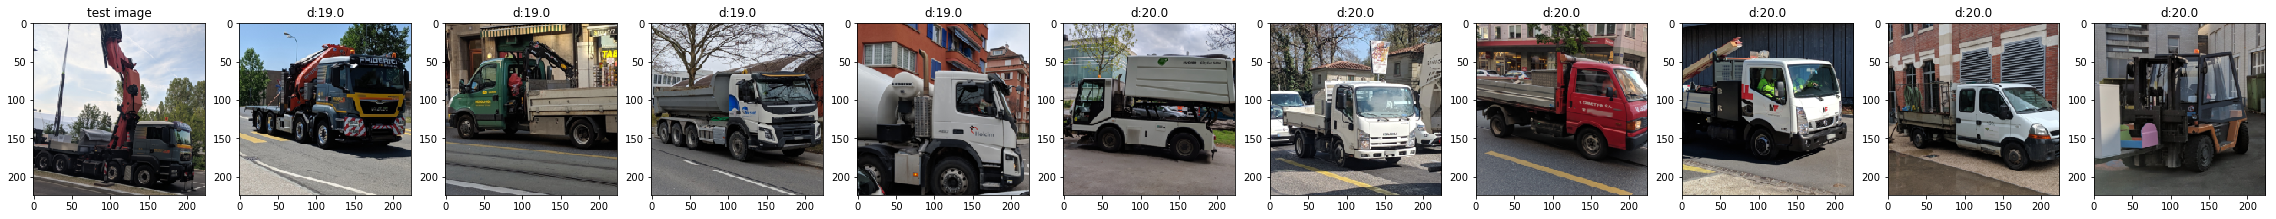

In [5]:
import imageio
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Create a model to find 10 nearest neighbors from the train set
neigh = NearestNeighbors(n_neighbors=11)
neigh.fit(X_tr)

# Pick an image randomly from test set, in this case a "truck"
distance, index = neigh.kneighbors(X_tr[[0]])

# Specifying the overall grid size
plt.figure(figsize=(40,40)) 

for i in range(0,distance.size):
    # Nummer of pictures per line
    plt.subplot(1,11,i+1) 
    img = X_tr_pixels[index[0][i]]
    if (i == 0):
        title = 'test image' 
    else: 
        title = 'd:' + str(round(distance[0][i], 0))
    plt.title(title)
    # Plot the image
    plt.imshow(img)
plt.show()

It should be noted that case 10 is an element of **"other"** but according to the model the distance is close to the test image.